In [2]:
from requests import Request, Session
from requests.exceptions import ConnectionError, Timeout, TooManyRedirects
import json

url = 'https://pro-api.coinmarketcap.com/v1/cryptocurrency/listings/latest' 
#Original Sandbox Environment: 'https://sandbox-api.coinmarketcap.com/v1/cryptocurrency/listings/latest'
parameters = {
  'start':'1',
  'limit':'15',
  'convert':'USD'
}
headers = {
  'Accepts': 'application/json',
  'X-CMC_PRO_API_KEY': '40664217-c387-459e-8ac8-5c14cee52f0c',
}

session = Session()
session.headers.update(headers)

try:
  response = session.get(url, params=parameters)
  data = json.loads(response.text)
  print(data)
except (ConnectionError, Timeout, TooManyRedirects) as e:
  print(e)

{'status': {'timestamp': '2024-04-30T08:49:44.058Z', 'error_code': 0, 'error_message': None, 'elapsed': 29, 'credit_count': 1, 'notice': None, 'total_count': 9840}, 'data': [{'id': 1, 'name': 'Bitcoin', 'symbol': 'BTC', 'slug': 'bitcoin', 'num_market_pairs': 11018, 'date_added': '2010-07-13T00:00:00.000Z', 'tags': ['mineable', 'pow', 'sha-256', 'store-of-value', 'state-channel', 'coinbase-ventures-portfolio', 'three-arrows-capital-portfolio', 'polychain-capital-portfolio', 'binance-labs-portfolio', 'blockchain-capital-portfolio', 'boostvc-portfolio', 'cms-holdings-portfolio', 'dcg-portfolio', 'dragonfly-capital-portfolio', 'electric-capital-portfolio', 'fabric-ventures-portfolio', 'framework-ventures-portfolio', 'galaxy-digital-portfolio', 'huobi-capital-portfolio', 'alameda-research-portfolio', 'a16z-portfolio', '1confirmation-portfolio', 'winklevoss-capital-portfolio', 'usv-portfolio', 'placeholder-ventures-portfolio', 'pantera-capital-portfolio', 'multicoin-capital-portfolio', 'para

In [3]:
type(data)


dict

In [20]:
import pandas as pd
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [65]:
df = pd.json_normalize(data['data'])
df['timestamp'] = pd.to_datetime('now')
df

,id,name,symbol,slug,num_market_pairs,date_added,tags,max_supply,circulating_supply,total_supply,infinite_supply,platform,cmc_rank,self_reported_circulating_supply,self_reported_market_cap,tvl_ratio,last_updated,quote.USD.price,quote.USD.volume_24h,quote.USD.volume_change_24h,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d,quote.USD.market_cap,quote.USD.market_cap_dominance,quote.USD.fully_diluted_market_cap,quote.USD.tvl,quote.USD.last_updated,platform.id,platform.name,platform.symbol,platform.slug,platform.token_address,timestamp
0,1,Bitcoin,BTC,bitcoin,11018,2010-07-13T00:00:00.000Z,"[mineable, pow, sha-256, store-of-value, state...",21000000.00000,19692106.00000,19692106.00000,False,NaN,1,NaN,NaN,None,2024-04-30T08:49:00.000Z,62118.15462,26159412056.48207,24.93920,-1.72213,-0.40103,-6.12111,-11.65115,-0.01090,44.53007,1223237285265.28369,53.42340,1304481246981.44995,None,2024-04-30T08:49:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-04-30 14:21:55.005809
1,1027,Ethereum,ETH,ethereum,8880,2015-08-07T00:00:00.000Z,"[pos, smart-contracts, ethereum-ecosystem, coi...",NaN,122056395.21776,122056395.21776,True,NaN,2,NaN,NaN,None,2024-04-30T08:48:00.000Z,3088.37395,13205419237.09498,-0.69160,-2.09255,-2.47773,-2.48351,-14.70773,-10.09500,32.11151,376955791224.82172,16.40410,376955791224.82001,None,2024-04-30T08:48:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-04-30 14:21:55.005809
2,825,Tether USDt,USDT,tether,84388,2015-02-25T00:00:00.000Z,"[stablecoin, asset-backed-stablecoin, avalanch...",NaN,110643229581.36777,113086550461.59590,True,NaN,3,NaN,NaN,None,2024-04-30T08:48:00.000Z,1.00000,48202032052.50661,16.62050,-0.00048,-0.00402,-0.03565,-0.01778,-0.03770,0.04858,110642923040.53008,4.81490,113086237151.45000,None,2024-04-30T08:48:00.000Z,1027.00000,Ethereum,ETH,ethereum,0xdac17f958d2ee523a2206206994597c13d831ec7,2024-04-30 14:21:55.005809
3,1839,BNB,BNB,bnb,2153,2017-07-25T00:00:00.000Z,"[marketplace, centralized-exchange, payments, ...",NaN,147587846.82669,147587846.82669,False,NaN,4,NaN,NaN,None,2024-04-30T08:48:00.000Z,590.12925,933968693.02956,12.92670,-2.02675,0.64361,-2.14623,-2.44130,44.92871,92.07897,87095905886.88084,3.79680,87095905886.88000,None,2024-04-30T08:48:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-04-30 14:21:55.005809
4,5426,Solana,SOL,solana,655,2020-04-10T00:00:00.000Z,"[pos, platform, solana-ecosystem, cms-holdings...",NaN,447321591.96398,574911541.75574,True,NaN,5,NaN,NaN,None,2024-04-30T08:48:00.000Z,131.85119,2625455056.52154,35.24280,-2.74016,-1.85755,-14.37818,-32.86115,-0.88644,30.42889,58979883702.36560,2.56660,75802770268.75999,None,2024-04-30T08:48:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-04-30 14:21:55.005809
5,3408,USDC,USDC,usd-coin,18760,2018-10-08T00:00:00.000Z,"[medium-of-exchange, stablecoin, asset-backed-...",NaN,33349867121.14877,33349867121.14877,False,NaN,6,NaN,NaN,None,2024-04-30T08:48:00.000Z,1.00002,6300810052.57697,34.35130,-0.01112,-0.01037,0.00505,0.00315,0.01267,-0.00834,33350619205.61873,1.45130,33350619205.62000,None,2024-04-30T08:48:00.000Z,1027.00000,Ethereum,ETH,ethereum,0xa0b86991c6218b36c1d19d4a2e9eb0ce3606eb48,2024-04-30 14:21:55.005809
6,52,XRP,XRP,xrp,1307,2013-08-04T00:00:00.000Z,"[medium-of-exchange, enterprise-solutions, arr...",100000000000.00000,55235913166.00000,99987652657.00000,False,NaN,7,NaN,NaN,None,2024-04-30T08:49:00.000Z,0.50111,1020764898.08742,13.33890,-1.98415,-0.26339,-8.49477,-20.16069,-15.36621,-1.79111,27679278935.18061,1.20450,50111018988.67000,None,2024-04-30T08:49:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-04-30 14:21:55.005809
7,74,Dogecoin,DOGE,dogecoin,958,2013-12-15T00:00:00.000Z,"[mineable, pow, scrypt, medium-of-exchange, me...",NaN,144095246383.70526,144095246383.70526,True,NaN,8,NaN,NaN,None,2024-04-30T08:49:00.000Z,0.13910,964082078.59938,23.27070,-1.99373,-1.07719,-12.02700,-32.58682,14.19699,74.51715,20043006380.42258,0.87540,20043006380.42000,None,2024-04-30T08:49:

In [79]:
def api_runner():
    global df
    url = 'https://pro-api.coinmarketcap.com/v1/cryptocurrency/listings/latest' 
    #Original Sandbox Environment: 'https://sandbox-api.coinmarketcap.com/v1/cryptocurrency/listings/latest'
    parameters = {
      'start':'1',
      'limit':'15',
      'convert':'USD'
    }
    headers = {
      'Accepts': 'application/json',
      'X-CMC_PRO_API_KEY': '40664217-c387-459e-8ac8-5c14cee52f0c',
    }

    session = Session()
    session.headers.update(headers)

    try:
      response = session.get(url, params=parameters)
      data = json.loads(response.text)
      #print(data)
    except (ConnectionError, Timeout, TooManyRedirects) as e:
      print(e)
    
    df2 = pd.json_normalize(data['data'])
    df2['Timestamp'] = pd.to_datetime('now')
    df = pd.concat([df, df2])
    
    if not os.path.isfile(r'C:\Users\hp\Downloads\API SCRIPTS\API.csv'):
        df.to_csv(r'C:\Users\hp\Downloads\API SCRIPTS\API.csv', header = 'column_names')
        
    else:
        df.to_csv(r'C:\Users\hp\Downloads\API SCRIPTS\API.csv', mode = 'a', header = False)


In [80]:
import os 
from time import time
from time import sleep

for i in range(333):
    api_runner()
    print('API Runner completed')
    sleep(60) #sleep for 1 minute
exit()

API Runner completed
API Runner completed
API Runner completed
API Runner completed
API Runner completed
API Runner completed
API Runner completed


KeyboardInterrupt: 

In [24]:
df66 = pd.read_csv(r'C:\Users\hp\Downloads\API SCRIPTS\API.csv')
df66

,Unnamed: 0,id,name,symbol,slug,num_market_pairs,date_added,tags,max_supply,circulating_supply,total_supply,infinite_supply,platform,cmc_rank,self_reported_circulating_supply,self_reported_market_cap,tvl_ratio,last_updated,quote.USD.price,quote.USD.volume_24h,quote.USD.volume_change_24h,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d,quote.USD.market_cap,quote.USD.market_cap_dominance,quote.USD.fully_diluted_market_cap,quote.USD.tvl,quote.USD.last_updated,platform.id,platform.name,platform.symbol,platform.slug,platform.token_address,Timestamp
0,0,1,Bitcoin,BTC,bitcoin,11018,2010-07-13T00:00:00.000Z,"['mineable', 'pow', 'sha-256', 'store-of-value...",2.100000e+07,1.969211e+07,1.969211e+07,False,NaN,1,NaN,NaN,NaN,2024-04-30T09:47:00.000Z,61827.068163,2.780556e+10,32.1302,-0.506500,-0.817115,-6.555772,-12.065477,-0.536343,44.308853,1.217505e+12,53.6013,1.298368e+12,NaN,2024-04-30T09:47:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-04-30 10:47:50.492810
1,1,1027,Ethereum,ETH,ethereum,8880,2015-08-07T00:00:00.000Z,"['pos', 'smart-contracts', 'ethereum-ecosystem...",NaN,1.220564e+08,1.220564e+08,True,NaN,2,NaN,NaN,NaN,2024-04-30T09:46:00.000Z,3053.211385,1.430864e+10,5.2565,-1.263556,-3.798201,-3.582376,-15.451194,-10.889553,31.306021,3.726640e+11,16.3910,3.726640e+11,NaN,2024-04-30T09:46:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-04-30 10:47:50.492810
2,2,825,Tether USDt,USDT,tether,84393,2015-02-25T00:00:00.000Z,"['stablecoin', 'asset-backed-stablecoin', 'ava...",NaN,1.106432e+11,1.130866e+11,True,NaN,3,NaN,NaN,NaN,2024-04-30T09:46:00.000Z,0.999668,5.103170e+10,22.0549,-0.022876,-0.028455,-0.076516,-0.055370,-0.112983,0.006390,1.106065e+11,4.8648,1.130490e+11,NaN,2024-04-30T09:46:00.000Z,1027.0,Ethereum,ETH,ethereum,0xdac17f958d2ee523a2206206994597c13d831ec7,2024-04-30 10:47:50.492810
3,3,1839,BNB,BNB,bnb,2153,2017-07-25T00:00:00.000Z,"['marketplace', 'centralized-exchange', 'payme...",NaN,1.475878e+08,1.475878e+08,False,NaN,4,NaN,NaN,NaN,2024-04-30T09:46:00.000Z,587.313244,9.789261e+08,16.8962,-0.508518,-0.036127,-3.068350,-2.759297,44.110423,92.748113,8.668030e+10,3.8179,8.668030e+10,NaN,2024-04-30T09:46:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-04-30 10:47:50.492810
4,4,5426,Solana,SOL,solana,655,2020-04-10T00:00:00.000Z,"['pos', 'platform', 'solana-ecosystem', 'cms-h...",NaN,4.473216e+08,5.749115e+08,True,NaN,5,NaN,NaN,NaN,2024-04-30T09:46:00.000Z,130.627513,2.780104e+09,42.5847,-0.974414,-3.252516,-14.988631,-33.546592,-2.217586,29.928889,5.843251e+10,2.5701,7.509927e+10,NaN,2024-04-30T09:46:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-04-30 10:47:50.492810
5,5,3408,USDC,USDC,usd-coin,18762,2018-10-08T00:00:00.000Z,"['medium-of-exchange', 'stablecoin', 'asset-ba...",NaN,3.334987e+10,3.334987e+10,False,NaN,6,NaN,NaN,NaN,2024-04-30T09:46:00.000Z,0.999818,6.604242e+09,37.8962,-0.017896,-0.029735,-0.022402,-0.022671,-0.018350,-0.031628,3.334380e+10,1.4666,3.334380e+10,NaN,2024-04-30T09:46:00.000Z,1027.0,Ethereum,ETH,ethereum,0xa0b86991c6218b36c1d19d4a2e9eb0ce3606eb48,2024-04-30 10:47:50.492810
6,6,52,XRP,XRP,xrp,1307,2013-08-04T00:00:00.000Z,"['medium-of-exchange', 'enterprise-solutions',...",1.000000e+11,5.523591e+10,9.998765e+10,False,NaN,7,NaN,NaN,NaN,2024-04-30T09:47:00.000Z,0.503141,1.065487e+09,13.9358,0.147231,-0.599933,-7.621722,-19.772280,-15.185696,-0.862639,2.779143e+10,1.2224,5.031406e+10,NaN,2024-04-30T09:47:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-04-30 10:47:50.492810
7,7,74,Dogecoin,DOGE,dogecoin,958,2013-12-15T00:00:00.000Z,"['mineable', 'pow', 'scrypt', 'medium-of-excha...",NaN,1.440952e+11,1.440952e+11,True,NaN,8,NaN,NaN,NaN,2024-04-30T09:47:00.000Z,0.139494,1.030691e+09,29.9246,-0.113591,-1.311450,-11.629336,-32.623782,13.416992,75.830958,2.010046e+10,0.8849,2.010046e+10,NaN,2024-04-30T09:47:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-04-30 10:47:50.492810
8,8,11419,Toncoin,TON,toncoin,305,2021-08-26T13:40:22.000Z,"['pos', 'layer-1', 'ftx-bankruptcy-

In [14]:

df

,id,name,symbol,slug,num_market_pairs,date_added,tags,max_supply,circulating_supply,total_supply,infinite_supply,platform,cmc_rank,self_reported_circulating_supply,self_reported_market_cap,tvl_ratio,last_updated,quote.USD.price,quote.USD.volume_24h,quote.USD.volume_change_24h,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d,quote.USD.market_cap,quote.USD.market_cap_dominance,quote.USD.fully_diluted_market_cap,quote.USD.tvl,quote.USD.last_updated,platform.id,platform.name,platform.symbol,platform.slug,platform.token_address,timestamp,Timestamp
0,1,Bitcoin,BTC,bitcoin,11018,2010-07-13T00:00:00.000Z,"[mineable, pow, sha-256, store-of-value, state...",2.100000e+07,1.969211e+07,1.969211e+07,False,NaN,1,NaN,NaN,None,2024-04-30T08:49:00.000Z,62118.154618,2.615941e+10,24.9392,-1.722128,-0.401030,-6.121110,-11.651155,-0.010905,44.530066,1.223237e+12,53.4234,1.304481e+12,None,2024-04-30T08:49:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-04-30 09:56:56.454161,NaT
1,1027,Ethereum,ETH,ethereum,8880,2015-08-07T00:00:00.000Z,"[pos, smart-contracts, ethereum-ecosystem, coi...",NaN,1.220564e+08,1.220564e+08,True,NaN,2,NaN,NaN,None,2024-04-30T08:48:00.000Z,3088.373948,1.320542e+10,-0.6916,-2.092551,-2.477726,-2.483514,-14.707728,-10.095000,32.111508,3.769558e+11,16.4041,3.769558e+11,None,2024-04-30T08:48:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-04-30 09:56:56.454161,NaT
2,825,Tether USDt,USDT,tether,84388,2015-02-25T00:00:00.000Z,"[stablecoin, asset-backed-stablecoin, avalanch...",NaN,1.106432e+11,1.130866e+11,True,NaN,3,NaN,NaN,None,2024-04-30T08:48:00.000Z,0.999997,4.820203e+10,16.6205,-0.000475,-0.004019,-0.035652,-0.017781,-0.037702,0.048577,1.106429e+11,4.8149,1.130862e+11,None,2024-04-30T08:48:00.000Z,1027.0,Ethereum,ETH,ethereum,0xdac17f958d2ee523a2206206994597c13d831ec7,2024-04-30 09:56:56.454161,NaT
3,1839,BNB,BNB,bnb,2153,2017-07-25T00:00:00.000Z,"[marketplace, centralized-exchange, payments, ...",NaN,1.475878e+08,1.475878e+08,False,NaN,4,NaN,NaN,None,2024-04-30T08:48:00.000Z,590.129254,9.339687e+08,12.9267,-2.026748,0.643610,-2.146227,-2.441299,44.928711,92.078974,8.709591e+10,3.7968,8.709591e+10,None,2024-04-30T08:48:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-04-30 09:56:56.454161,NaT
4,5426,Solana,SOL,solana,655,2020-04-10T00:00:00.000Z,"[pos, platform, solana-ecosystem, cms-holdings...",NaN,4.473216e+08,5.749115e+08,True,NaN,5,NaN,NaN,None,2024-04-30T08:48:00.000Z,131.851189,2.625455e+09,35.2428,-2.740156,-1.857553,-14.378180,-32.861146,-0.886442,30.428893,5.897988e+10,2.5666,7.580277e+10,None,2024-04-30T08:48:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-04-30 09:56:56.454161,NaT
5,3408,USDC,USDC,usd-coin,18760,2018-10-08T00:00:00.000Z,"[medium-of-exchange, stablecoin, asset-backed-...",NaN,3.334987e+10,3.334987e+10,False,NaN,6,NaN,NaN,None,2024-04-30T08:48:00.000Z,1.000023,6.300810e+09,34.3513,-0.011119,-0.010366,0.005050,0.003150,0.012670,-0.008345,3.335062e+10,1.4513,3.335062e+10,None,2024-04-30T08:48:00.000Z,1027.0,Ethereum,ETH,ethereum,0xa0b86991c6218b36c1d19d4a2e9eb0ce3606eb48,2024-04-30 09:56:56.454161,NaT
6,52,XRP,XRP,xrp,1307,2013-08-04T00:00:00.000Z,"[medium-of-exchange, enterprise-solutions, arr...",1.000000e+11,5.523591e+10,9.998765e+10,False,NaN,7,NaN,NaN,None,2024-04-30T08:49:00.000Z,0.501110,1.020765e+09,13.3389,-1.984149,-0.263389,-8.494772,-20.160688,-15.366206,-1.791108,2.767928e+10,1.2045,5.011102e+10,None,2024-04-30T08:49:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-04-30 09:56:56.454161,NaT
7,74,Dogecoin,DOGE,dogecoin,958,2013-12-15T00:00:00.000Z,"[mineable, pow, scrypt, medium-of-exchange, me...",NaN,1.440952e+11,1.440952e+11,True,NaN,8,NaN,NaN,None,2024-04-30T08:49:00.000Z,0.139096,9.640821e+08,23.2707,-1.993732,-1.077194,-12.026996,-32.586823,14.196994,74.517147,2.004301e+10,0.8754,2.004301e+10,None,2024-04-30T08:49:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-04-30 09:56:56.454161,NaT
8,11419,Toncoin,TON,toncoin,305,2021-08-26T13:40:22.000Z,"[pos, la

In [25]:
pd.set_option('display.float_format', lambda x: '%.5f' % x)


In [26]:
df

,id,name,symbol,slug,num_market_pairs,date_added,tags,max_supply,circulating_supply,total_supply,infinite_supply,platform,cmc_rank,self_reported_circulating_supply,self_reported_market_cap,tvl_ratio,last_updated,quote.USD.price,quote.USD.volume_24h,quote.USD.volume_change_24h,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d,quote.USD.market_cap,quote.USD.market_cap_dominance,quote.USD.fully_diluted_market_cap,quote.USD.tvl,quote.USD.last_updated,platform.id,platform.name,platform.symbol,platform.slug,platform.token_address,Timestamp
0,1,Bitcoin,BTC,bitcoin,11018,2010-07-13T00:00:00.000Z,"[mineable, pow, sha-256, store-of-value, state...",21000000.00000,19692106.00000,19692106.00000,False,NaN,1,NaN,NaN,None,2024-04-30T09:57:00.000Z,61739.88739,27841538039.67758,31.77870,-0.39779,-1.22394,-6.59197,-12.12623,-0.70012,44.45800,1215788406912.56226,53.48280,1296537635190.65991,None,2024-04-30T09:57:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-04-30 10:58:24.313976
1,1027,Ethereum,ETH,ethereum,8880,2015-08-07T00:00:00.000Z,"[pos, smart-contracts, ethereum-ecosystem, coi...",NaN,122056395.21776,122056395.21776,True,NaN,2,NaN,NaN,None,2024-04-30T09:56:00.000Z,3052.19762,14414095963.22185,5.92530,-1.07250,-4.04581,-3.57215,-15.34070,-11.03772,31.49351,372540239249.25171,16.38470,372540239249.25000,None,2024-04-30T09:56:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-04-30 10:58:24.313976
2,825,Tether USDt,USDT,tether,84393,2015-02-25T00:00:00.000Z,"[stablecoin, asset-backed-stablecoin, avalanch...",NaN,110643229581.36777,113086550461.59590,True,NaN,3,NaN,NaN,None,2024-04-30T09:56:00.000Z,0.99963,51185910993.89688,22.17620,-0.08796,-0.06140,-0.09030,-0.06323,-0.11252,-0.02290,110602740516.40129,4.86440,113045167281.57001,None,2024-04-30T09:56:00.000Z,1027.00000,Ethereum,ETH,ethereum,0xdac17f958d2ee523a2206206994597c13d831ec7,2024-04-30 10:58:24.313976
3,1839,BNB,BNB,bnb,2153,2017-07-25T00:00:00.000Z,"[marketplace, centralized-exchange, payments, ...",NaN,147587846.82669,147587846.82669,False,NaN,4,NaN,NaN,None,2024-04-30T09:56:00.000Z,585.60815,981842825.07405,17.39880,-0.54687,-0.50956,-3.30629,-3.04276,43.49044,92.22993,86428646400.40849,3.80040,86428646400.41000,None,2024-04-30T09:56:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-04-30 10:58:24.313976
4,5426,Solana,SOL,solana,655,2020-04-10T00:00:00.000Z,"[pos, platform, solana-ecosystem, cms-holdings...",NaN,447321591.96398,574911541.75574,True,NaN,5,NaN,NaN,None,2024-04-30T09:56:00.000Z,130.17535,2788641589.46285,42.41620,-0.85813,-4.13528,-15.30618,-33.79564,-2.60392,30.05716,58230242774.16353,2.56100,74839308567.96001,None,2024-04-30T09:56:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-04-30 10:58:24.313976
5,3408,USDC,USDC,usd-coin,18762,2018-10-08T00:00:00.000Z,"[medium-of-exchange, stablecoin, asset-backed-...",NaN,33349867121.14877,33349867121.14877,False,NaN,6,NaN,NaN,None,2024-04-30T09:56:00.000Z,0.99991,6621369736.86886,37.73270,-0.08385,-0.05420,-0.03177,-0.02026,-0.00421,-0.04745,33346972241.25006,1.46690,33346972241.25000,None,2024-04-30T09:56:00.000Z,1027.00000,Ethereum,ETH,ethereum,0xa0b86991c6218b36c1d19d4a2e9eb0ce3606eb48,2024-04-30 10:58:24.313976
6,52,XRP,XRP,xrp,1307,2013-08-04T00:00:00.000Z,"[medium-of-exchange, enterprise-solutions, arr...",100000000000.00000,55235913166.00000,99987652657.00000,False,NaN,7,NaN,NaN,None,2024-04-30T09:57:00.000Z,0.50296,1064421224.51379,13.08170,0.25765,-0.77317,-7.80216,-19.73169,-15.25366,-0.84780,27781398241.74176,1.22190,50295897450.36000,None,2024-04-30T09:57:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-04-30 10:58:24.313976
7,74,Dogecoin,DOGE,dogecoin,958,2013-12-15T00:00:00.000Z,"[mineable, pow, scrypt, medium-of-exchange, me...",NaN,144095246383.70526,144095246383.70526,True,NaN,8,NaN,NaN,None,2024-04-30T09:57:00.000Z,0.13882,1033164912.11281,30.10940,-0.07631,-2.13769,-12.11065,-32.77897,13.32684,75.15590,20002615654.20752,0.87990,20002615654.21000,None,2024-04-30T09

In [27]:
df3 = df.groupby('name', sort=False)[['quote.USD.percent_change_1h','quote.USD.percent_change_24h','quote.USD.percent_change_7d','quote.USD.percent_change_30d','quote.USD.percent_change_60d','quote.USD.percent_change_90d']].mean()
df3

,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d
name,,,,,,
Bitcoin,-0.39779,-1.22394,-6.59197,-12.12623,-0.70012,44.45800
Ethereum,-1.07250,-4.04581,-3.57215,-15.34070,-11.03772,31.49351
Tether USDt,-0.08796,-0.06140,-0.09030,-0.06323,-0.11252,-0.02290
BNB,-0.54687,-0.50956,-3.30629,-3.04276,43.49044,92.22993
Solana,-0.85813,-4.13528,-15.30618,-33.79564,-2.60392,30.05716
USDC,-0.08385,-0.05420,-0.03177,-0.02026,-0.00421,-0.04745
XRP,0.25765,-0.77317,-7.80216,-19.73169,-15.25366,-0.84780
Dogecoin,-0.07631,-2.13769,-12.11065,-32.77897,13.32684,75.15590
Toncoin,-0.67935,-0.12547,-6.45768,2.32624,90.20051,152.71076


In [37]:
df4 = df3.stack()
df4

name                                      
Bitcoin       quote.USD.percent_change_1h     -0.39779
              quote.USD.percent_change_24h    -1.22394
              quote.USD.percent_change_7d     -6.59197
              quote.USD.percent_change_30d   -12.12623
              quote.USD.percent_change_60d    -0.70012
              quote.USD.percent_change_90d    44.45800
Ethereum      quote.USD.percent_change_1h     -1.07250
              quote.USD.percent_change_24h    -4.04581
              quote.USD.percent_change_7d     -3.57215
              quote.USD.percent_change_30d   -15.34070
              quote.USD.percent_change_60d   -11.03772
              quote.USD.percent_change_90d    31.49351
Tether USDt   quote.USD.percent_change_1h     -0.08796
              quote.USD.percent_change_24h    -0.06140
              quote.USD.percent_change_7d     -0.09030
              quote.USD.percent_change_30d    -0.06323
              quote.USD.percent_change_60d    -0.11252
              quote.US

In [38]:
type(df4)


pandas.core.series.Series

In [39]:
df5 = df4.to_frame(name='values')
df5

values
name                                               
Bitcoin      quote.USD.percent_change_1h   -0.39779
             quote.USD.percent_change_24h  -1.22394
             quote.USD.percent_change_7d   -6.59197
             quote.USD.percent_change_30d -12.12623
             quote.USD.percent_change_60d  -0.70012
             quote.USD.percent_change_90d  44.45800
Ethereum     quote.USD.percent_change_1h   -1.07250
             quote.USD.percent_change_24h  -4.04581
             quote.USD.percent_change_7d   -3.57215
             quote.USD.percent_change_30d -15.34070
             quote.USD.percent_change_60d -11.03772
             quote.USD.percent_change_90d  31.49351
Tether USDt  quote.USD.percent_change_1h   -0.08796
             quote.USD.percent_change_24h  -0.06140
             quote.USD.percent_change_7d   -0.09030
             quote.USD.percent_change_30d  -0.06323
             quote.USD.percent_change_60d  -0.11252
             quote.USD.percent_change_90d  -0.02290
BNB          quote.USD.percent_change_1h   -0.54687
             quote.USD.percent_change_24h  -0.50956
             quote.USD.percent_change_7d   -3.30629
             quote.USD.percent_change_30d  -3.04276
             quote.USD.percent_change_60d  43.49044
             quote.USD.percent_change_90d  92.22993
Solana       quote.USD.percent_change_1h   -0.85813
             quote.USD.percent_change_24h  -4.13528
             quote.USD.percent_change_7d  -15.30618
             quote.USD.percent_change_30d -33.79564
             quote.USD.percent_change_60d  -2.60392
             quote.USD.percent_change_90d  30.05716
USDC         quote.USD.percent_change_1h   -0.08385
             quote.USD.percent_change_24h  -0.05420
             quote.USD.percent_change_7d   -0.03177
             quote.USD.percent_change_30d  -0.02026
             quote.USD.percent_change_60d  -0.00421
             quote.USD.percent_change_90d  -0.04745
XRP          quote.USD.percent_change_1h    0.25765
             quote.USD.percent_change_24h  -0.77317
             quote.USD.percent_change_7d   -7.80216
             quote.USD.percent_change_30d -19.73169
             quote.USD.percent_change_60d -15.25366
             quote.USD.percent_change_90d  -0.84780
Dogecoin     quote.USD.percent_change_1h   -0.07631
             quote.USD.percent_change_24h  -2.13769
             quote.USD.percent_change_7d  -12.11065
             quote.USD.percent_change_30d -32.77897
             quote.USD.percent_change_60d  13.32684
             quote.USD.percent_change_90d  75.15590
Toncoin      quote.USD.percent_change_1h   -0.67935
             quote.USD.percent_change_24h  -0.12547
             quote.USD.percent_change_7d   -6.45768
             quote.USD.percent_change_30d   2.32624
             quote.USD.percent_change_60d  90.20051
             quote.USD.percent_change_90d 152.71076
Cardano      quote.USD.percent_change_1h   -0.13811
             quote.USD.percent_change_24h  -2.78051
             quote.USD.percent_change_7d  -14.56261
             quote.USD.percent_change_30d -31.94271
             quote.USD.percent_change_60d -35.06849
             quote.USD.percent_change_90d -12.58433
Shiba Inu    quote.USD.percent_change_1h   -0.22393
             quote.USD.percent_change_24h  -0.37683
             quote.USD.percent_change_7d  -12.06387
             quote.USD.percent_change_30d -22.89927
             quote.USD.percent_change_60d  78.41926
             quote.USD.percent_change_90d 159.78166
Avalanche    quote.USD.percent_change_1h    0.14487
             quote.USD.percent_change_24h   1.30299
             quote.USD.percent_change_7d  -11.73886
             quote.USD.percent_change_30d -37.31620
             quote.USD.percent_change_60d -20.86313
             quote.USD.percent_change_90d  -2.08033
TRON         quote.USD.percent_change_1h    0.34655
             quote.USD.percent_change_24h   0.80047
             quote.USD.percent_change_7d    6.80616
             quote.USD.percent_change_30d

In [51]:
type(df5)

pandas.core.frame.DataFrame

In [54]:


df6 = df5.reset_index()
df6

,name,level_1,values
0,Bitcoin,quote.USD.percent_change_1h,-0.39779
1,Bitcoin,quote.USD.percent_change_24h,-1.22394
2,Bitcoin,quote.USD.percent_change_7d,-6.59197
3,Bitcoin,quote.USD.percent_change_30d,-12.12623
4,Bitcoin,quote.USD.percent_change_60d,-0.70012
5,Bitcoin,quote.USD.percent_change_90d,44.45800
6,Ethereum,quote.USD.percent_change_1h,-1.07250
7,Ethereum,quote.USD.percent_change_24h,-4.04581
8,Ethereum,quote.USD.percent_change_7d,-3.57215
9,Ethereum,quote.USD.percent_change_30d,-15.34070


In [55]:
df7 = df6.rename(columns={'level_1': 'percent_change'})
df7

,name,percent_change,values
0,Bitcoin,quote.USD.percent_change_1h,-0.39779
1,Bitcoin,quote.USD.percent_change_24h,-1.22394
2,Bitcoin,quote.USD.percent_change_7d,-6.59197
3,Bitcoin,quote.USD.percent_change_30d,-12.12623
4,Bitcoin,quote.USD.percent_change_60d,-0.70012
5,Bitcoin,quote.USD.percent_change_90d,44.45800
6,Ethereum,quote.USD.percent_change_1h,-1.07250
7,Ethereum,quote.USD.percent_change_24h,-4.04581
8,Ethereum,quote.USD.percent_change_7d,-3.57215
9,Ethereum,quote.USD.percent_change_30d,-15.34070


In [58]:
df7['percent_change'] = df7['percent_change'].replace(['quote.USD.percent_change_24h','quote.USD.percent_change_7d','quote.USD.percent_change_30d','quote.USD.percent_change_60d','quote.USD.percent_change_90d'],['24h','7d','30d','60d','90d'])
df7

,name,percent_change,values
0,Bitcoin,quote.USD.percent_change_1h,-0.39779
1,Bitcoin,24h,-1.22394
2,Bitcoin,7d,-6.59197
3,Bitcoin,30d,-12.12623
4,Bitcoin,60d,-0.70012
5,Bitcoin,90d,44.45800
6,Ethereum,quote.USD.percent_change_1h,-1.07250
7,Ethereum,24h,-4.04581
8,Ethereum,7d,-3.57215
9,Ethereum,30d,-15.34070


In [67]:
import seaborn as sns
import matplotlib.pyplot as plt

C:\Users\hp\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


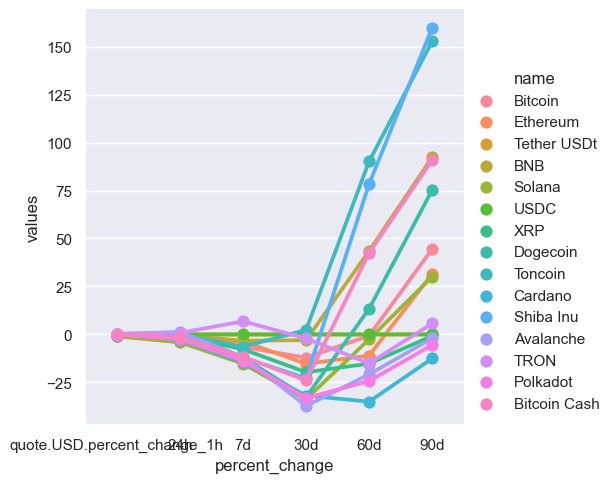

In [68]:
sns.catplot(x='percent_change', y='values', hue='name', data=df7, kind='point')


In [88]:
df10 = df[['name','quote.USD.price','timestamp']]
df10 = df10.query("name == 'Bitcoin'")
df10

,name,quote.USD.price,timestamp
0,Bitcoin,62118.15462,2024-04-30 14:21:55.005809
0,Bitcoin,61269.27286,NaT
0,Bitcoin,61162.47224,NaT
0,Bitcoin,61162.47224,NaT
0,Bitcoin,61011.11442,NaT
0,Bitcoin,60970.27089,NaT
0,Bitcoin,60881.90407,NaT
0,Bitcoin,60881.90407,NaT


<Axes: xlabel='timestamp', ylabel='quote.USD.price'>

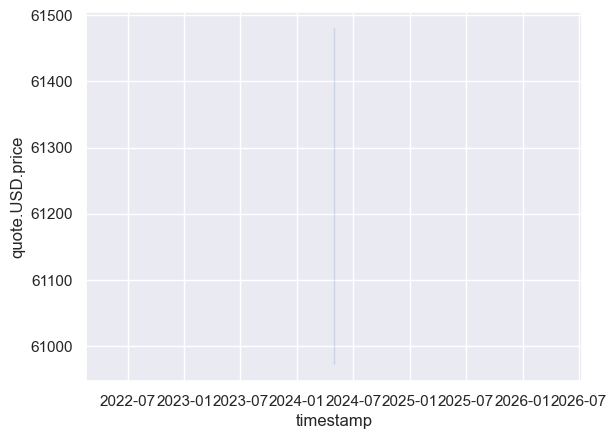

In [90]:
sns.set_theme(style="darkgrid")

sns.lineplot(x='timestamp', y='quote.USD.price', data = df10)